<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%AC%B8%EC%9E%A5_%EA%B4%80%EA%B3%84_%EB%B6%84%EB%A5%98_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%AC%B8%EC%9E%A5_%EA%B4%80%EA%B3%84_%EB%B6%84%EB%A5%98_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#패키지 불러오기 및 각종 설치 & 폰트 설정 한방에 
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 7.3 MB/s 
     |████████████████████████████████| 448 kB 61.7 MB/s 


In [3]:
import pandas as pd
from glob import glob
import os
import numpy as np
from tqdm import tqdm, tqdm_notebook

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [15]:
import seaborn as sns

In [10]:
train=pd.read_csv('/content/train_data.csv')
test=pd.read_csv('/content/test_data.csv')
sample=pd.read_csv('/content/sample_submission.csv')

In [12]:
print(train.shape)
print(test.shape)
print(sample.shape)

(24998, 4)
(1666, 4)
(1666, 2)


In [13]:
train.head()

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


# 데이터 시각화


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


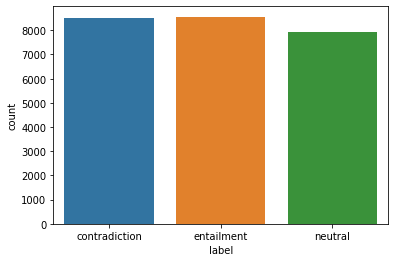

In [16]:
sns.countplot(data=train,x='label')

In [17]:
#리뷰길이
premise_len_mean=np.mean(train['premise'].str.len())
print('실제 text 평균 길이:',premise_len_mean)

hypo_len_mean=np.mean(train['hypothesis'].str.len())
print('가설 Text 평균 길이 :',hypo_len_mean)

실제 text 평균 길이: 45.406552524201935
가설 Text 평균 길이 : 24.924433954716378


In [18]:
mask_true=(train.label=='entailment')
mask_false=(train.label=='contradiction')
mask_neutral=(train.label=='neutral')

In [20]:
mask_true

0        False
1        False
2         True
3        False
4        False
         ...  
24993    False
24994     True
24995    False
24996     True
24997    False
Name: label, Length: 24998, dtype: bool

In [21]:
df_train=train.premise.copy()

In [22]:
df_true=train.loc[mask_true,:].premise
df_false=train.loc[mask_false,:].premise
df_neu=train.loc[mask_neutral,:].premise

#세집합을 리스트로 묶기
compare=[df_train,df_true,df_false,df_neu]

In [23]:
df_true.head()

2                       이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.
5     이번 증설로 코오롱인더스트리는 기존 생산량 7만7000톤에서 1만6800톤이 늘어나...
10                       대부분 도보로 이동하기 충분하다는 점이 매력적이었어요.
12                          영화 시작부터 끝까지 긴장감을 늦출 수가 없네요.
16    국토교통부는 연료보조금 지급 근거를 마련하기 위해 올해 하반기에 여객자동차 및 화물...
Name: premise, dtype: object

In [24]:
df_false

0        씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...
1        삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...
7                               시대상황을 고려하는 현명한 시청태도가 요구되다.
8                        사진과 차이없는 아기자기한 실내소품들과 분위기가 멋졌습니다.
9                               빠른 답장과 간편한 체크인, 깨끗한 집 좋았어요
                               ...                        
24986    또한 독립출판물 제작 워크숍이랑 글쓰기 소설 쓰기 워크숍도 진행하며 원데이 수업을 ...
24987    경기도는 올해 도내 직장민방위대장 1,044명을 대상으로 3월 6일부터 15일까지 ...
24988                                기획의 문제라기보다는 익숙해짐의 문제.
24990                               호스트 토모코 상은 매우 친절하셨습니다.
24995     한편 이날 중앙방역대책본부는 집단 감염이 발생한 음식점 관련 역학조사 결과를 공개했다.
Name: premise, Length: 8489, dtype: object

In [27]:
compare

[0        씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...
 1        삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...
 2                          이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.
 3        광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...
 4        진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...
                                ...                        
 24993    오페라에 비하여 오라토리오에서는 독창보다도 합창이 중시되며, 테스토 또는 이스토리쿠...
 24994                               지하철역까지 걸어서 5분 정도 걸립니다.
 24995     한편 이날 중앙방역대책본부는 집단 감염이 발생한 음식점 관련 역학조사 결과를 공개했다.
 24996                        마미손이 랩을 하자 시청자들은 그의 정체를 파악했다.
 24997           집근처에 지하철역,버스정류장이 있기때문에 다른 곳으로 이동하는데 좋았습니다.
 Name: premise, Length: 24998, dtype: object,
 2                          이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.
 5        이번 증설로 코오롱인더스트리는 기존 생산량 7만7000톤에서 1만6800톤이 늘어나...
 10                          대부분 도보로 이동하기 충분하다는 점이 매력적이었어요.
 12                             영화 시작부터 끝까지 긴장감을 늦출 수가 없네요.
 16       국토교통부는 연료보조금 지급 근거를 마련하기 위해 올해 하반기에 여객자동차 및 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


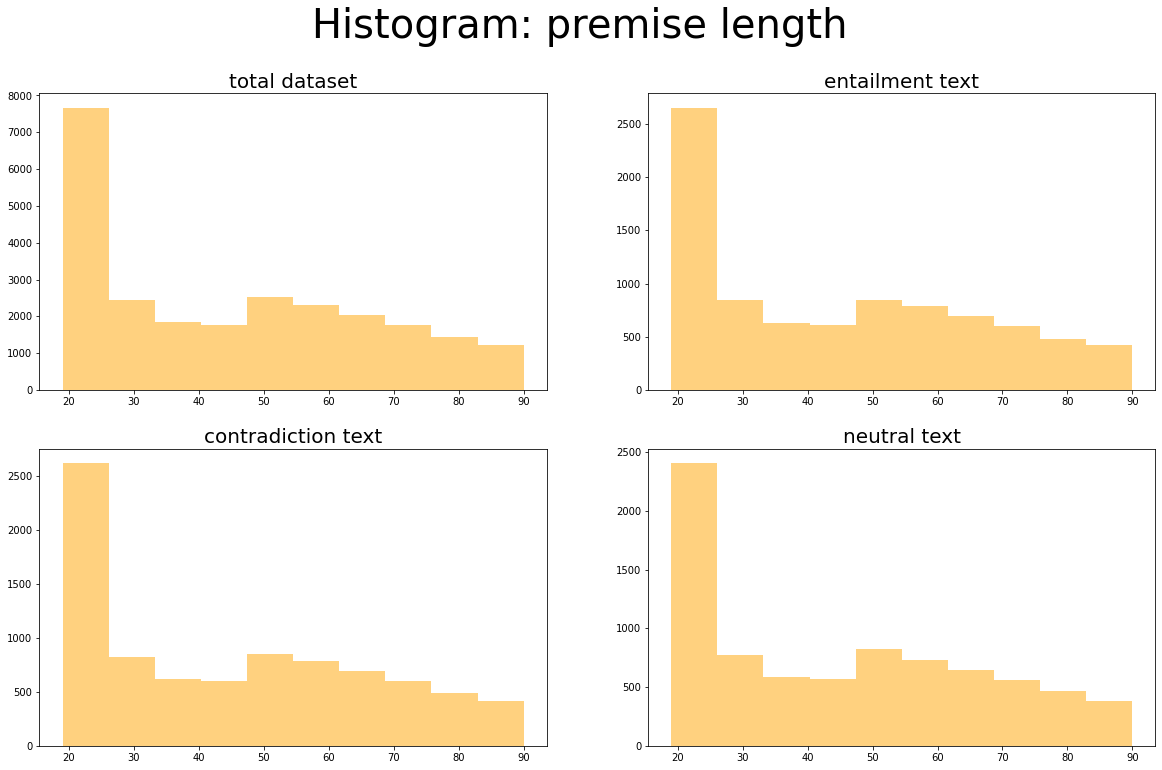

In [25]:
plt.figure(figsize=(20,12))
plt.suptitle("Histogram: premise length", fontsize=40)
name = ['total dataset', 'entailment text', 'contradiction text', 'neutral text']

for i in range(len(compare)):
  document=compare[i]
  string_len=[len(x) for x in document]
  plt.subplot(2,2,i+1)
  plt.title(name[i],fontsize=20)
  plt.hist(string_len,alpha=0.5,color='orange')

plt.show()

In [29]:
# 데이터 필터링을 위한 마스크 설정 (Hypothesis  부분만)
mask_true = (train.label == 'entailment')
mask_false = (train.label == 'contradiction')
mask_neutral = (train.label == 'neutral')

df_train = train.hypothesis .copy()

df_true = train.loc[mask_true,:].hypothesis 
df_false = train.loc[mask_false,:].hypothesis 
df_neu = train.loc[mask_neutral,:].hypothesis 

# 세 집합을 리스트로 묶어줍니다.
compare = [df_train, df_true, df_false, df_neu]

In [30]:
df_true.head()

2     예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.
5         코오롱 인더스트리는 총 9만 3800톤의 생산 능력을 확보했다.
10                            대부분 걸어서 갈수 있어요.
12                        영화 시작부터 긴장감이 함께하네요.
16      여객자동차 및 화물자동차 운수사업법을 국토교통부가 개정할 계획이다.
Name: hypothesis, dtype: object

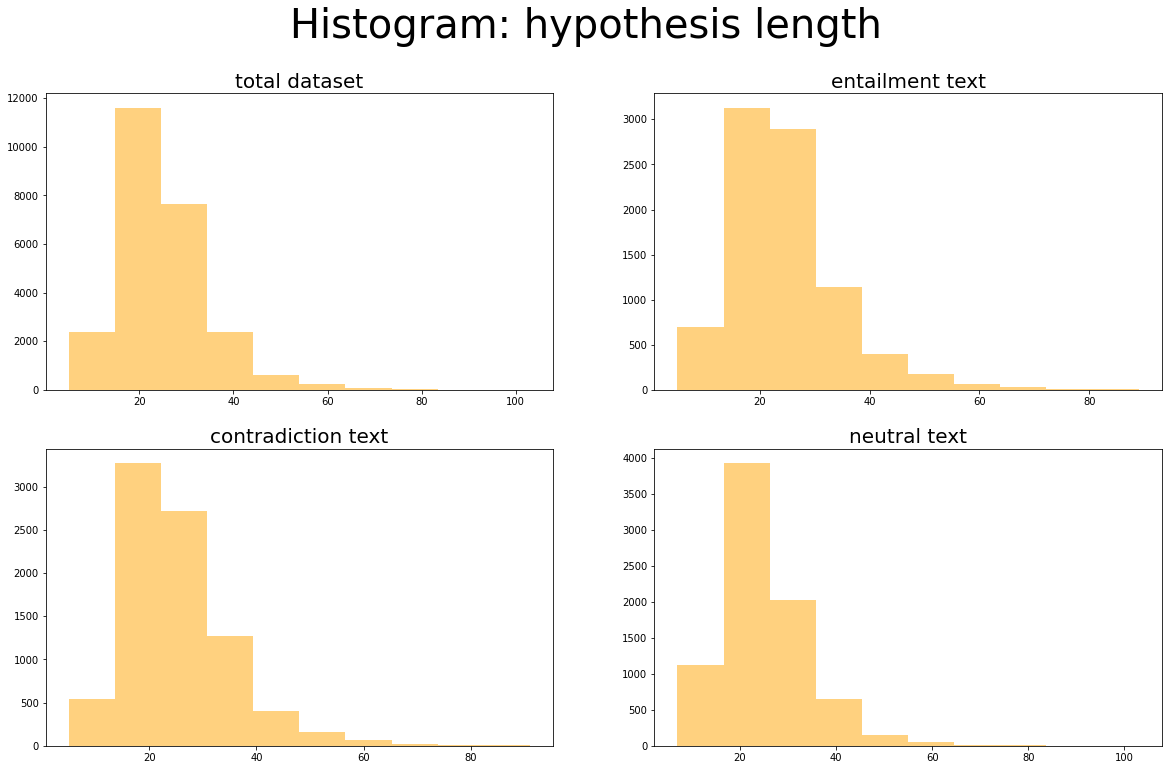

In [31]:
# 히스토그램을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,12))
plt.suptitle("Histogram: hypothesis length", fontsize=40)
name = ['total dataset', 'entailment text', 'contradiction text', 'neutral text']

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document] 
    plt.subplot(2, 2, i+1)
    plt.title(name[i], fontsize=20)
    plt.hist(string_len, alpha=0.5, color='orange') 
    
plt.show()

# Word cloud

In [28]:
def df2str(df):
  #전체 리뷰들을 하나의 문자열로 만든다.
  s=[s for s in df]
  document=""
  for i in range(len(s)):
    document+=s[i]
  return document

def get_noun(text):
  #okt tagger를 이용해 명사 추출
  okt=Okt()
  noun=okt.nouns(text)
  for i,v in enumerate(noun):
    if len(v)<2:
      noun.pop(i)
  count=Counter(noun)
  noun_list=count.most_common(100)

  return noun_list

def visualize(noun_list,title):
  wc=WordCloud(
      background_color='white',#배경색깔
      colormap='Dark2',#폰트색
      font_path=font_path,
      width=800,
      height=800
  ).generate_from_frequencies(dict(noun_list))

  plt.figure(figsize=(10,10))
  plt.title(title, fontsize=20)
  plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
  plt.axis('off') #x y 축 숫자 제거
  plt.show()  # 워드클라우드 이미지 확인
    
  return wc

## Entailment

In [32]:
document=df2str(df_train)#전체 리뷰들을 하나의 문자열로 만든다
noun_list=get_noun(document)#명사 추출, 개수 세기
noun_list[:10]

[('영화', 2053),
 ('숙소', 713),
 ('사람', 539),
 ('호스트', 443),
 ('위치', 421),
 ('사업', 401),
 ('대한', 342),
 ('가장', 336),
 ('지원', 328),
 ('예정', 316)]

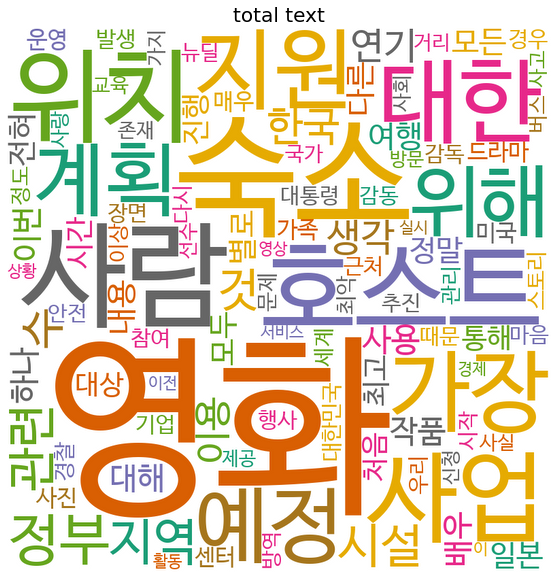

In [33]:
total_text=visualize(noun_list,'total text')

## contradiction

In [34]:
document=df2str(df_true)
noun_list=get_noun(document)
noun_list[:10]

[('영화', 700),
 ('숙소', 244),
 ('사람', 182),
 ('위치', 169),
 ('사업', 149),
 ('호스트', 146),
 ('위해', 122),
 ('지원', 122),
 ('시설', 111),
 ('수', 108)]

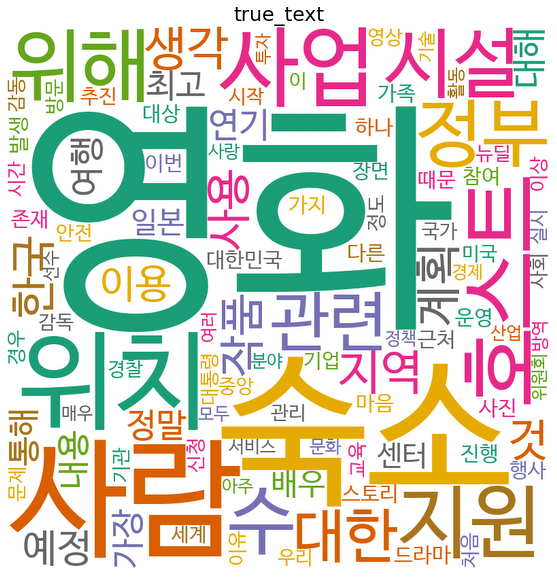

In [35]:
true_text=visualize(noun_list,'true_text')

In [36]:
document = df2str(df_false) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:10] 

[('영화', 700),
 ('숙소', 238),
 ('전혀', 198),
 ('사람', 181),
 ('별로', 165),
 ('위치', 146),
 ('호스트', 144),
 ('사업', 142),
 ('관련', 130),
 ('대한', 126)]

## Neutral

In [37]:
document = df2str(df_neu) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:10] 

[('영화', 653),
 ('숙소', 231),
 ('가장', 192),
 ('사람', 176),
 ('호스트', 153),
 ('예정', 140),
 ('위해', 113),
 ('대한', 110),
 ('사업', 110),
 ('위치', 106)]

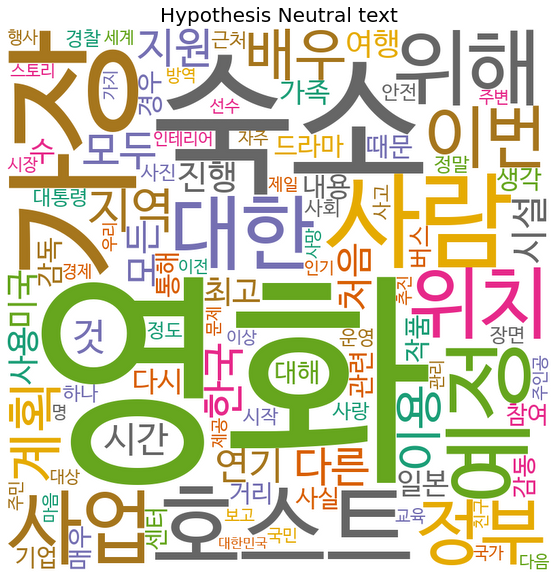

In [38]:
neutral_text = visualize(noun_list,'Hypothesis Neutral text') # 워드클라우드 시각화